In [ ]:
#!pip install spacy
#!pip install emoji

In [5]:
import spacy
nlp = spacy.load("en")

import emoji
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


In [10]:
import pandas as pd
pd.set_option('max_colwidth', 80)

from re import sub, split
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE, MDS
import seaborn as sns
import re

def plot_embedding(V, y):
    """ Visualizes a vocabulary embedding via TSNE """
    V = TruncatedSVD(50).fit_transform(V)
    d = TSNE(metric='cosine').fit_transform(V)
    d = pd.DataFrame(d).assign(label = y.reset_index(drop=True))
    return sns.scatterplot(x = 0, y = 1, hue = 'label', data = d), d


def clean_twitter(s):
    """ Cleans Twitter specific issues
    
    Should probably clean out mentions, URLs, and RT's.
    """

    # TODO: Use regular expressions to remove unwanted
    # text and clean up our tweets to be more usable!
    
    # syntax: sub("bad thing", "desired thing", your object to store it)
    
    # twitter stuff
    s = sub("@", " ", s) ##mentions
    s = sub("RT", "", s) ##retweets
    s = sub("#", "", s) ##hashtag identifier
    s = emoji.demojize(s) ##emojis
    
    # unwanted symbols/punctuations
    s = sub("%", " percent", s) ##percents
    s = sub("&amp;", "and", s) ##ampersands
    s = sub("&gt;", "more", s) ##more than
    s = sub("&lt;3", "love", s) ##<3 heart
    s = sub("&lt;", "less", s) ##less than
    s = sub("'s", "", s) ##possessive or contraction
    s = sub("'re", "", s) ##contraction
    s = sub("'ll", "", s) ##contraction
    
    # typical text mining things
    s = sub("\n", "", s) ##line breaks
    s = re.sub(r"http\S+", "", s) ##hyperlinks
    s = s.lower() ##case sensitivity

    
    # BONUS: Try using the library "spacy" to 
    
    doc = nlp(s) ##from spacy website
    
    # do further processing, such as lemmatizing
    
    for token in doc:
        if not token.is_punct | token.is_stop:
            " ".join(token.lemma_)
    
    # or replacing Named Entities with constants (i.e. "[NAMED]")
    # or adding the part of speech or dependency code to the word 

    return s

re.sub(pattern, repl, string, count=0, flags=0)

Return the string obtained by replacing the leftmost non-overlapping occurrences of pattern in string by the replacement repl. If the pattern isn’t found, string is returned unchanged. 

repl can be a string or a function; if it is a string, any backslash escapes in it are processed. That is, \n is converted to a single newline character, \r is converted to a carriage return, and so forth. Unknown escapes such as \j are left alone. 

Backreferences, such as \6, are replaced with the substring matched by group 6 in the pattern. For example:X = pd.read_csv('data/tweets.csv').tweet
y = pd.read_csv('data/tweets.csv').label

X.map(clean_twitter)

In [11]:
X = pd.read_csv('data/tweets.csv').tweet
y = pd.read_csv('data/tweets.csv').label

In [12]:
X.map(clean_twitter)

0         lilmissrightie: here cnn on sharia law. you can be stoned or have your han...
1         networksmanager: look obama clinton cronies illegally arm and train muslim...
2         grrrgraphics: throwbackthursday bengarrison cartoon from 2013 obama gets c...
3               petertownsend7: say 'islam is peace', or else!  trump maga isis tcot   
4         todddracula:  realdonaldtrump all aboard the trump train! choochoo :locomo...
5         judicialwatch: flashback moremore judicial watch releases huma abedin depo...
6         loudobbs: following fbi presser,  realdonaldtrump says “the system is rigg...
7                           ricky_vaughn99: trump: "we running against a rigged press" 
8         mitchellvii: literally 98 percent of hillary supporters i see online are a...
9                                clarkw2016:  constantinci  cathyto47590555 islam. ... 
10        mightybusterbro: .psycho - motherhillary at her most evil.maga  basketofde...
11        thomaspkennedy3: the u

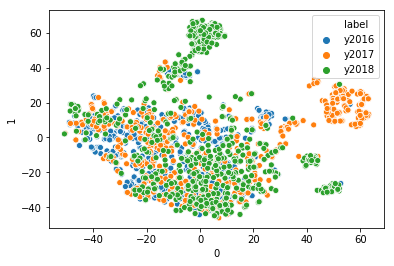

In [13]:
# Let's visualize our data by using nothing but the Sklearn default
# cleaning and tokenizing

vectorizer = CountVectorizer()
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)

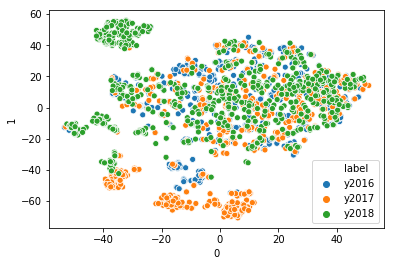

In [14]:
# Now let's see what our cleaning has done

vectorizer = CountVectorizer(preprocessor = clean_twitter)
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)

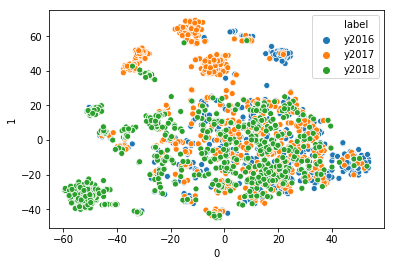

In [15]:
# Now try with TF-IDF vectorizer, and add implicit stopwords!
# Can you get things to separate in the space in a better way?

#not sure how much more is wanted here? but plot looks better
vectorizer = TfidfVectorizer(preprocessor=clean_twitter)
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)